# **CNN with Data augmentation**


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score  , ConfusionMatrixDisplay , classification_report , f1_score , precision_score , recall_score , confusion_matrix
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf
import seaborn as sns

import keras
from prettytable import PrettyTable
from tabulate import tabulate
from keras.preprocessing.image import ImageDataGenerator
import imgaug as ia
import imgaug.augmenters as iaa


2023-06-07 14:56:37.065159: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
categories = ['jogging' , 
              'sitting' , 
              'standing' , 
              'walking']

data_directory = '/mnt/d/CV_project_phase_1/Dataset_images/'

In [26]:

image_size = (256, 256)
dataset = []
labels = []

for category in categories:
    folder_path = os.path.join(data_directory, category)
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        image = load_img(image_path, target_size=image_size)
        image_array = img_to_array(image)
        dataset.append(image_array)
        labels.append(categories.index(category))

dataset = np.array(dataset)
dataset = dataset.astype(np.uint8)
labels = np.array(labels)

In [122]:
seq = iaa.Sequential([


    iaa.Sometimes(
        0.5,
        iaa.GaussianBlur(sigma=(0, 0.5)) ,
        iaa.Crop(percent=(0, 0.05)) , 
        
    ),

    iaa.LinearContrast((0.75, 1.5)),
    #iaa.Cutout(nb_iterations=1 , size = (0.3)) ,
    iaa.Sometimes(
        0.7 , 
        iaa.Cutout(nb_iterations=2 , size = (0.2) , cval=0) , 
        

    ),

    iaa.Sometimes(0.7 , 
                  iaa.CoarseDropout((0.0, 0.05), size_percent=(0.02, 0.1))               
                  ) , 
  

    iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5),

    iaa.Multiply((0.8, 1.2), per_channel=0.2),
    
    iaa.Affine(
        scale={"x": (0.9, 1.1), "y": (0.9, 1.1)},
        translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)},
        rotate=(-10, 10),
        shear=(-8, 8) , 

    )
], random_order=False) # apply augmenters in random order

In [124]:
augmented_images = []

augmented_labels = []


# Iterate through each image in the dataset
for i in range(len(dataset)):
    image = dataset[i]
    label = labels[i]

    # Apply augmentation to the image
    augmented_image = seq.augment_image(image)

    # Append augmented image and corresponding label to the lists
    augmented_images.append(augmented_image)
    augmented_labels.append(label)

# Convert the lists to numpy arrays
augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)

# Concatenate the augmented images and labels with the original dataset
augmented_dataset = np.concatenate((dataset, augmented_images), axis=0)
augmented_labels = np.concatenate((labels, augmented_labels), axis=0)




In [127]:
train_data, val_data, train_labels, val_labels = train_test_split(augmented_dataset, augmented_labels, test_size=0.2, random_state=42)

In [128]:
# Step 4: CNN Architecture
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(categories), activation='softmax')
])

2023-06-07 16:37:36.835037: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-07 16:37:36.867187: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [129]:
# Step 5: Model Compilation
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(train_data, train_labels, validation_data=(val_data, val_labels), epochs=10, batch_size=32)

Epoch 1/10
130/130 [==============================] - 335s 3s/step - loss: 32.7261 - accuracy: 0.3355 - val_loss: 1.3397 - val_accuracy: 0.4072
Epoch 2/10
130/130 [==============================] - 331s 3s/step - loss: 1.3247 - accuracy: 0.3641 - val_loss: 1.3201 - val_accuracy: 0.3491
Epoch 3/10
130/130 [==============================] - 322s 2s/step - loss: 1.1862 - accuracy: 0.4458 - val_loss: 1.2996 - val_accuracy: 0.4091
Epoch 4/10
130/130 [==============================] - 308s 2s/step - loss: 0.8392 - accuracy: 0.6401 - val_loss: 1.2560 - val_accuracy: 0.5184
Epoch 5/10
130/130 [==============================] - 205s 2s/step - loss: 0.6092 - accuracy: 0.7528 - val_loss: 1.5962 - val_accuracy: 0.5164
Epoch 6/10
130/130 [==============================] - 197s 2s/step - loss: 0.3491 - accuracy: 0.8735 - val_loss: 2.2630 - val_accuracy: 0.5309
Epoch 7/10
130/130 [==============================] - 197s 2s/step - loss: 0.2276 - accuracy: 0.9224 - val_loss: 2.9238 - val_accuracy: 0.605

In [130]:
model.save('../Models/CNN_Aug.h5')

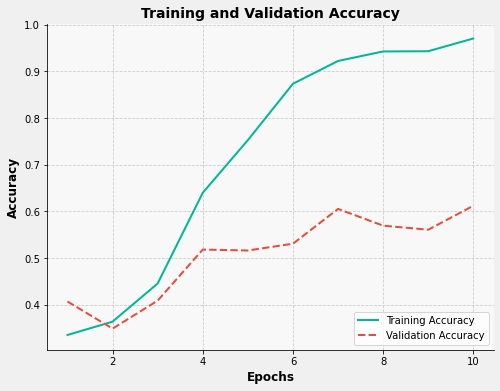

In [131]:
# Extract the accuracy and validation accuracy from the history
accuracy = model.history.history['accuracy']
val_accuracy = model.history.history['val_accuracy']

# Plot accuracy and validation accuracy
epochs = range(1, len(accuracy) + 1)

# Set custom color palette
color_palette = ['#00b894', '#e74c3c']

# Customize figure and axes
fig, ax = plt.subplots(figsize=(8, 6))  # Adjust the width and height as needed
fig.set_facecolor('#f0f0f0')  # Set the background color of the figure
ax.set_facecolor('#ffffff')  # Set the background color of the plot area
ax.grid(color='#cccccc', linestyle='--')  # Set grid lines color and style

# Plot accuracy and validation accuracy with custom styles
ax.plot(epochs, accuracy, color_palette[0], label='Training Accuracy', linewidth=2)
ax.plot(epochs, val_accuracy, color_palette[1], label='Validation Accuracy', linewidth=2, linestyle='--')

# Customize labels and title
ax.set_xlabel('Epochs', fontsize=12, fontweight='bold')
ax.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
ax.set_title('Training and Validation Accuracy', fontsize=14, fontweight='bold')

# Customize legend
ax.legend(loc='lower right', fontsize=10)

# Add a subtle background pattern
ax.set_facecolor('#f8f8f8')
ax.set_alpha(0.9)
ax.set_zorder(0)

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

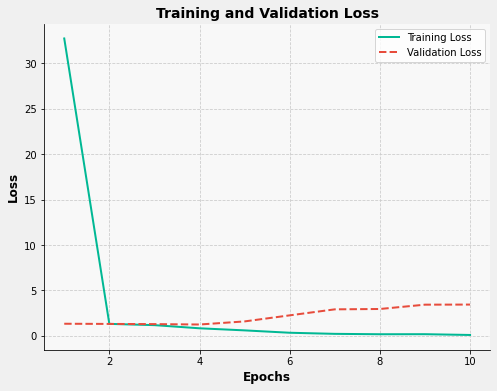

In [132]:
# Extract the loss and validation loss from the history
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

# Plot loss and validation loss
epochs = range(1, len(loss) + 1)

# Set custom color palette
color_palette = ['#00b894', '#e74c3c']

# Customize figure and axes
fig, ax = plt.subplots(figsize=(8, 6))  # Adjust the width and height as needed
fig.set_facecolor('#f0f0f0')  # Set the background color of the figure
ax.set_facecolor('#ffffff')  # Set the background color of the plot area
ax.grid(color='#cccccc', linestyle='--')  # Set grid lines color and style

# Plot loss and validation loss with custom styles
ax.plot(epochs, loss, color_palette[0], label='Training Loss', linewidth=2)
ax.plot(epochs, val_loss, color_palette[1], label='Validation Loss', linewidth=2, linestyle='--')

# Customize labels and title
ax.set_xlabel('Epochs', fontsize=12, fontweight='bold')
ax.set_ylabel('Loss', fontsize=12, fontweight='bold')
ax.set_title('Training and Validation Loss', fontsize=14, fontweight='bold')

# Customize legend
ax.legend(loc='upper right', fontsize=10)

# Add a subtle background pattern
ax.set_facecolor('#f8f8f8')
ax.set_alpha(0.9)
ax.set_zorder(0)

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

33/33 [==============================] - 16s 482ms/step


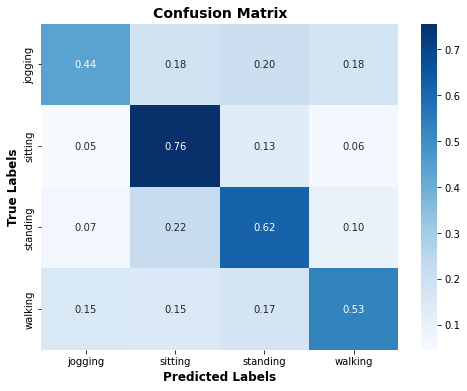

In [133]:
predictions = model.predict(val_data)
predicted_labels = np.argmax(predictions, axis=1)


class_names = ['jogging' , 
              'sitting' , 
              'standing' , 
              'walking']
# Create confusion matrix
cm = confusion_matrix(val_labels, predicted_labels)

# Normalize the confusion matrix
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Customize the heatmap colors
cmap = 'Blues'  # Change the color palette here

# Plot the heatmap
sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap=cmap, xticklabels=class_names, yticklabels=class_names, ax=ax)

# Customize labels and title
ax.set_xlabel('Predicted Labels', fontsize=12, fontweight='bold')
ax.set_ylabel('True Labels', fontsize=12, fontweight='bold')
ax.set_title('Confusion Matrix', fontsize=14, fontweight='bold')

plt.show()

In [134]:
report = classification_report(val_labels, predicted_labels, target_names=class_names, output_dict=True)

# Create a pretty table
table = PrettyTable()
table.field_names = ['Class', 'Precision', 'Recall', 'F1-Score', 'Support']

# Add rows to the table
for class_name, scores in report.items():
    if class_name in class_names:
        precision = scores['precision']
        recall = scores['recall']
        f1_score = scores['f1-score']
        support = scores['support']
        table.add_row([class_name, precision, recall, f1_score, support])

# Set alignment and format for numeric columns
table.align['Class'] = 'l'
table.align['Precision'] = 'f'
table.align['Recall'] = 'f'
table.align['F1-Score'] = 'f'
table.align['Support'] = 'c'

# Print the styled classification report
print(table)

+----------+--------------------+--------------------+--------------------+---------+
| Class    |     Precision      |       Recall       |      F1-Score      | Support |
+----------+--------------------+--------------------+--------------------+---------+
| jogging  |      0.60625       | 0.4369369369369369 | 0.5078534031413613 |   222   |
| sitting  | 0.6962962962962963 | 0.7560321715817694 | 0.7249357326478149 |   373   |
| standing | 0.5428571428571428 | 0.6153846153846154 | 0.5768500948766604 |   247   |
| walking  | 0.5396825396825397 |      0.53125       | 0.5354330708661418 |   192   |
+----------+--------------------+--------------------+--------------------+---------+


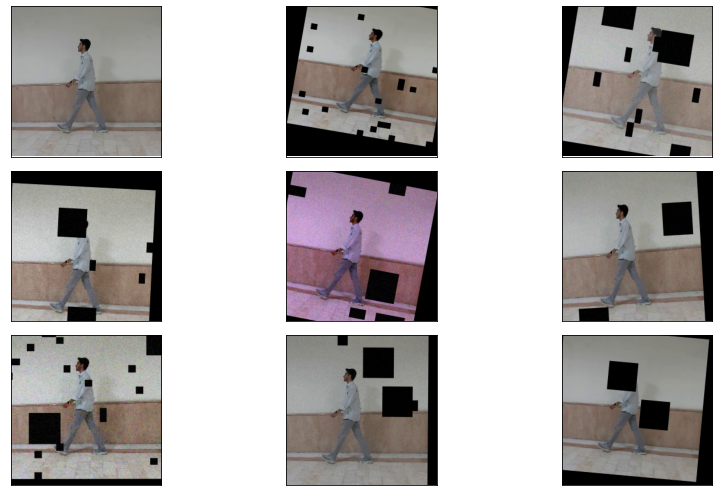

In [188]:
## Demonstration of the effect of data augmentation on an sample image


sample_image_1 = dataset[2462]

sample_image_2 = dataset[20]

samples = [sample_image_1 , sample_image_2]

augments = []

for i in range(8) : 

    images_aug = seq(images=samples)

    augments.append(images_aug[0])
sample = np.expand_dims(sample_image_1, axis=0)
total = np.concatenate((sample, augments), axis=0)


plt.figure(figsize=(13,7))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(total[i])
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()
